<a href="https://colab.research.google.com/github/elmox0818/ai_learning/blob/master/2020_02_03%E3%83%A1%E3%83%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 正規分布

## 平均値

$$
  \mu = \frac{x_1 + x_2 + \cdots + x_n}{n}
  = \frac{1}{n}\sum_{k=1}^{n} x_k
$$


In [2]:
import numpy as np

x = np.array([55,45,60,40])
np.average(x)

50.0

## 分散

値のばらつき具合を表す

$$
  V = \frac{1}{n}\sum_{k=1}^{n}(x_k - \mu)^2
$$

In [3]:
import numpy as np

x = np.array([55,45,60,40])
np.var(x)

62.5

## 標準偏差

値のばらつき具合、分散よりも直感的な数値を表す。

$$
  \delta = \sqrt{V} = \sqrt{\frac{1}{n}\sum_{k=1}^{n}(x_k-\mu)^2}
$$



> 確率密度関数 
>横軸はある値を、縦軸は値の頻度や確率を表す。
>μは平均値で分布中央、δは標準偏差で分布の広がり具合を表す。

$$
  y = \frac{1}{\delta\sqrt{2\pi}}\exp(-\frac{(x-\mu)^2}{2\delta^2})
$$

μ=0, δ=1とすると

$$
  y = \frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2})
$$



In [4]:
import numpy as np

x = np.array([55,45,60,40])
np.std(x)

7.905694150420948

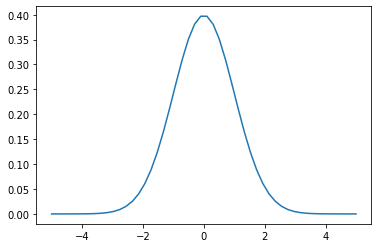

In [5]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1 # 標準偏差
mu = 0 # 平均値

x = np.linspace(-5, 5)
y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sigma**2)) # 確率密度関数

plt.plot(x,y)
plt.show()

# Pythonにおける正規表現

## subによる置換

re.subにより文字列の置換

In [10]:
import re

s = "私は柴犬が好きです。"

# 単体置換
s = re.sub("柴犬", "シャムネコ", s)
print(s)

s = "私は黒犬と白猫が好きです。"

# 複数置換
s = re.sub("[犬猫]", "馬", s)
print(s)

s = "私は柴犬犬犬犬犬犬犬犬犬犬が好きです"

# 繰り返し
s = re.sub("犬+", "犬", s)
print(s)

私はシャムネコが好きです。
私は黒馬と白馬が好きです。
私は柴犬が好きです


## ルビの除去

【】などを除去する方法

【^】]+の箇所で】以外の文字の繰り返しを意味する。
【[^】]+】は【と】の間に】以外の文字が複数ある個所を表す。

In [12]:
import re

s = "私は柴犬【しばいぬ】が好きです。"

s = re.sub("【[^】]+】", "", s)
print(s)

s = "白馬【はくば】に乗って、草原【そうげん】をかける"
s = re.sub("【[^】]+】", "", s)
print(s)

私は柴犬が好きです。
白馬に乗って、草原をかける


# コーパスの前処理

In [27]:
!ls nlp_bot/Section_6/

gingatetsudono_yoru.txt


In [30]:
with open("nlp_bot/Section_6/gingatetsudono_yoru.txt", mode="r", encoding="utf-8") as f:
  data = f.read()
line1 = data.split("\n")[0]
print(line1)

「ではみなさんは、そういうふうに川だと云《い》われたり、乳の流れたあとだと云われたりしていたこのぼんやりと白いものがほんとうは何かご承知ですか。」先生は、黒板に吊《つる》した大きな黒い星座の図の、上から下へ白くけぶった銀河帯のようなところを指《さ》しながら、みんなに問《とい》をかけました。


読み込んだ小説のデータから正規表現を用いてルビなどを除去。
その後、文章ごとにリストに格納してpickleを使って保存。

In [49]:
import re
import pickle

data = re.sub("≪[^≫]+≫", "", data) # ルビの削除
data = re.sub("[《≪]", "", data) # ルビの削除
data = re.sub("［[^］]+］", "", data) # 読みの注意の削除
data = re.sub("[｜ 　「」\n]", "", data) # | と全角半角スペース、「」と改行の削除
separator = "。"
data_list = data.split(separator)
data_list.pop() # 最後は空の文字列なので削除
data_list = [x+separator for x in data_list] # 文章の最後に。を追加

print(data_list)
with open("data.pickle", mode="wb") as f:
  pickle.dump(data_list, f)

['ではみなさんは、そういうふうに川だと云いわれたり、乳の流れたあとだと云われたりしていたこのぼんやりと白いものがほんとうは何かご承知ですか。', '先生は、黒板に吊つるした大きな黒い星座の図の、上から下へ白くけぶった銀河帯のようなところを指さしながら、みんなに問といをかけました。', 'カムパネルラが手をあげました。', 'それから四五人手をあげました。', 'ジョバンニも手をあげようとして、急いでそのままやめました。', 'たしかにあれがみんな星だと、いつか雑誌で読んだのでしたが、このごろはジョバンニはまるで毎日教室でもねむく、本を読むひまも読む本もないので、なんだかどんなこともよくわからないという気持ちがするのでした。', 'ところが先生は早くもそれを見附みつけたのでした。', 'ジョバンニさん。', 'あなたはわかっているのでしょう。', 'ジョバンニは勢いきおいよく立ちあがりましたが、立って見るともうはっきりとそれを答えることができないのでした。', 'ザネリが前の席からふりかえって、ジョバンニを見てくすっとわらいました。', 'ジョバンニはもうどぎまぎしてまっ赤になってしまいました。', '先生がまた云いました。', '大きな望遠鏡で銀河をよっく調べると銀河は大体何でしょう。', 'やっぱり星だとジョバンニは思いましたがこんどもすぐに答えることができませんでした。', '先生はしばらく困ったようすでしたが、眼めをカムパネルラの方へ向けて、ではカムパネルラさん。', 'と名指しました。', 'するとあんなに元気に手をあげたカムパネルラが、やはりもじもじ立ち上ったままやはり答えができませんでした。', '先生は意外なようにしばらくじっとカムパネルラを見ていましたが、急いででは。', 'よし。', 'と云いながら、自分で星図を指さしました。', 'このぼんやりと白い銀河を大きないい望遠鏡で見ますと、もうたくさんの小さな星に見えるのです。', 'ジョバンニさんそうでしょう。', 'ジョバンニはまっ赤になってうなずきました。', 'けれどもいつかジョバンニの眼のなかには涙なみだがいっぱいになりました。', 'そうだ僕ぼくは知っていたのだ、勿論もちろんカムパネルラも知っている、それはいつかカムパネルラのお父さんの博士のうちでカムパネルラといっしょに読んだ雑誌のなかに

保存されているか確認する。

In [50]:
with open("data.pickle", mode="rb") as f:
  data_list = pickle.load(f)
print(data_list)

['ではみなさんは、そういうふうに川だと云いわれたり、乳の流れたあとだと云われたりしていたこのぼんやりと白いものがほんとうは何かご承知ですか。', '先生は、黒板に吊つるした大きな黒い星座の図の、上から下へ白くけぶった銀河帯のようなところを指さしながら、みんなに問といをかけました。', 'カムパネルラが手をあげました。', 'それから四五人手をあげました。', 'ジョバンニも手をあげようとして、急いでそのままやめました。', 'たしかにあれがみんな星だと、いつか雑誌で読んだのでしたが、このごろはジョバンニはまるで毎日教室でもねむく、本を読むひまも読む本もないので、なんだかどんなこともよくわからないという気持ちがするのでした。', 'ところが先生は早くもそれを見附みつけたのでした。', 'ジョバンニさん。', 'あなたはわかっているのでしょう。', 'ジョバンニは勢いきおいよく立ちあがりましたが、立って見るともうはっきりとそれを答えることができないのでした。', 'ザネリが前の席からふりかえって、ジョバンニを見てくすっとわらいました。', 'ジョバンニはもうどぎまぎしてまっ赤になってしまいました。', '先生がまた云いました。', '大きな望遠鏡で銀河をよっく調べると銀河は大体何でしょう。', 'やっぱり星だとジョバンニは思いましたがこんどもすぐに答えることができませんでした。', '先生はしばらく困ったようすでしたが、眼めをカムパネルラの方へ向けて、ではカムパネルラさん。', 'と名指しました。', 'するとあんなに元気に手をあげたカムパネルラが、やはりもじもじ立ち上ったままやはり答えができませんでした。', '先生は意外なようにしばらくじっとカムパネルラを見ていましたが、急いででは。', 'よし。', 'と云いながら、自分で星図を指さしました。', 'このぼんやりと白い銀河を大きないい望遠鏡で見ますと、もうたくさんの小さな星に見えるのです。', 'ジョバンニさんそうでしょう。', 'ジョバンニはまっ赤になってうなずきました。', 'けれどもいつかジョバンニの眼のなかには涙なみだがいっぱいになりました。', 'そうだ僕ぼくは知っていたのだ、勿論もちろんカムパネルラも知っている、それはいつかカムパネルラのお父さんの博士のうちでカムパネルラといっしょに読んだ雑誌のなかに

# 形態素解析

言葉の意味で文章を分割する。

janomeを使う。インストールは下記
> pip install janome

In [47]:
from janome.tokenizer import Tokenizer

t = Tokenizer()

s = "すもももももももものうち"

word_list = t.tokenize(s, wakati=True)
print(word_list)

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']


## 保存したテキストを分かち書き

In [51]:
with open("data.pickle", mode="rb") as f:
  data_list = pickle.load(f)

for sentence in data_list:
  print(t.tokenize(sentence, wakati=True))

['では', 'みなさん', 'は', '、', 'そういう', 'ふう', 'に', '川', 'だ', 'と', '云い', 'われ', 'たり', '、', '乳', 'の', '流れ', 'た', 'あと', 'だ', 'と', '云わ', 'れ', 'たり', 'し', 'て', 'い', 'た', 'この', 'ぼんやり', 'と', '白い', 'もの', 'が', 'ほんとう', 'は', '何', 'か', 'ご', '承知', 'です', 'か', '。']
['先生', 'は', '、', '黒板', 'に', '吊', 'つるし', 'た', '大きな', '黒い', '星座', 'の', '図', 'の', '、', '上', 'から', '下', 'へ', '白く', 'けぶっ', 'た', '銀河', '帯', 'の', 'よう', 'な', 'ところ', 'を', '指さし', 'ながら', '、', 'みんな', 'に', '問', 'とい', 'を', 'かけ', 'まし', 'た', '。']
['カムパネルラ', 'が', '手', 'を', 'あげ', 'まし', 'た', '。']
['それから', '四', '五', '人', '手', 'を', 'あげ', 'まし', 'た', '。']
['ジョバンニ', 'も', '手', 'を', 'あげよ', 'う', 'として', '、', '急い', 'で', 'そのまま', 'やめ', 'まし', 'た', '。']
['たしかに', 'あれ', 'が', 'みんな', '星', 'だ', 'と', '、', 'いつか', '雑誌', 'で', '読ん', 'だ', 'の', 'でし', 'た', 'が', '、', 'このごろ', 'は', 'ジョバンニ', 'は', 'まるで', '毎日', '教室', 'で', 'も', 'ねむく', '、', '本', 'を', '読む', 'ひま', 'も', '読む', '本', 'も', 'ない', 'ので', '、', 'なんだか', 'どんな', 'こと', 'も', 'よく', 'わから', 'ない', 'という', '気持ち', 'が', 'する', 'の', 'でし', 'た', '。']
['ところが', '先生